In [2]:
# Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, 

# Libraries for data visualization
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics


In [3]:
data_path = 'data/adult/adult_train_bin.csv'
train = pd.read_csv(data_path)

data_path = 'data/adult/adult_test_bin.csv'
test = pd.read_csv(data_path)

In [9]:
from model.farcon import FarconVAE

class args_adult:
    alpha=2.0
    batch_size=30162
    batch_size_te=15060
    beta=0.15 
    beta_anneal=0
    clf_act='leaky'
    clf_hidden_units=64
    clf_layers=2
    clf_path='./bestclf/bestclf_adult.pth'
    clf_seq='fad'
    clip_val=2.0
    connection=0
    cont_xs=1
    data_name='adult'
    data_path='./data/adult/'
    dec_act='gelu'
    dec_seq='fa'
    drop_p=0.3
    early_stop=0
    enc_act='gelu'
    enc_seq='fa'
    encoder='mlp'
    end_fac=0.001
    env_eps=0.15
    env_flag='nn'
    epochs=300
    eval_model='lr'
    fade_in=1
    gamma=0.75
    hidden_units=64
    kernel='t', 
    last_epmod=0
    last_epmod_eval=1
    latent_dim=15
    lr=0.001, 
    max_lr=0.03
    model_name='ours'
    model_path='./model_adult4Sep'
    n_features=95
    n_seed=10
    neg_slop=0.1
    patience=30
    pred_act='leaky'
    pred_seq='fba'
    result_path='./result_adult'
    run_mode='e2e'
    s_dim=1
    save_name='default'
    scheduler='one'
    seed=730
    sensitive='gender_ Male'
    target='income_ >50K'
    test_file_name='adult_test_bin.csv'
    tr_ratio=1.0 
    train_file_name='adult_train_bin.csv'
    vis=0
    vis_path='./TSNE/'
    wd=0.0001
    y_dim=1

args = args_adult()

In [5]:
import torch
device = torch.device('cpu')

In [6]:
vae = FarconVAE(args, device)
model_pth ="model_adult_4Sep/farcon_2023_09_04_18_40_39_699483_ours.pth"

vae.load_state_dict(torch.load(model_pth, map_location=device))
vae.to(device)

FarconVAE(
  (encoder): Encoder(
    (fc): Linear(in_features=96, out_features=64, bias=True)
    (dropout): Dropout(p=0.3, inplace=False)
    (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (out): Linear(in_features=64, out_features=60, bias=True)
    (act): GELU(approximate='none')
    (net): Sequential(
      (0): Linear(in_features=96, out_features=64, bias=True)
      (1): GELU(approximate='none')
    )
  )
  (decoder): Decoder(
    (fc): Linear(in_features=30, out_features=64, bias=True)
    (out): Linear(in_features=64, out_features=96, bias=True)
    (dropout): Dropout(p=0.3, inplace=False)
    (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): GELU(approximate='none')
    (net): Sequential(
      (0): Linear(in_features=30, out_features=64, bias=True)
      (1): GELU(approximate='none')
    )
  )
  (predictor): OneLinearLayer(
    (layer): Linear(in_features=15, out_features=1, bias=True)
 

In [7]:
from model.base import BestClf

best_clf_pth = "bestclf/bestclf_adult.pth"

xy_clf = BestClf(args.n_features, 1, args.hidden_units, args)
xy_clf.load_state_dict(torch.load(best_clf_pth, map_location=device))

xy_clf.to(device)

BestClf(
  (fc1): Linear(in_features=95, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sep_conn): Linear(in_features=95, out_features=64, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act): LeakyReLU(negative_slope=0.1)
  (net): Sequential(
    (0): Linear(in_features=95, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.1)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): LeakyReLU(negative_slope=0.1)
    (5): Dropout(p=0.3, inplace=False)
  )
)

In [10]:
from dataset import get_xsy_loaders
import os

train_loader, test_loader = get_xsy_loaders(os.path.join(args.data_path, args.train_file_name),
                                                    os.path.join(args.data_path, args.test_file_name),
                                                    args.data_name, args.sensitive, args.batch_size_te, args)


In [19]:
from util.encode import *
representation_tr, z_tr, _, _ = encode_all(args, train_loader.dataset, vae, xy_clf, device, is_train=False)
representation_te, _, _, _ = encode_all(args, test_loader.dataset, vae, xy_clf, device, is_train=True)

tensor([[1., 0., 1.,  ..., 1., 0., 0.],
        [1., 0., 1.,  ..., 1., 0., 0.],
        [1., 1., 0.,  ..., 1., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 1., 0., 0.],
        [0., 1., 0.,  ..., 1., 0., 0.],
        [1., 1., 0.,  ..., 1., 0., 0.]])
tensor([[0., 1., 0.,  ..., 1., 0., 0.],
        [1., 0., 0.,  ..., 1., 0., 0.],
        [0., 1., 1.,  ..., 1., 0., 0.],
        ...,
        [1., 1., 1.,  ..., 1., 0., 0.],
        [1., 0., 1.,  ..., 1., 0., 0.],
        [0., 1., 1.,  ..., 1., 0., 0.]])


In [12]:
z_tr.shape

(30162, 15)

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(representation_te)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15060 samples in 0.011s...
[t-SNE] Computed neighbors for 15060 samples in 2.700s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15060
[t-SNE] Computed conditional probabilities for sample 2000 / 15060
[t-SNE] Computed conditional probabilities for sample 3000 / 15060
[t-SNE] Computed conditional probabilities for sample 4000 / 15060
[t-SNE] Computed conditional probabilities for sample 5000 / 15060
[t-SNE] Computed conditional probabilities for sample 6000 / 15060
[t-SNE] Computed conditional probabilities for sample 7000 / 15060
[t-SNE] Computed conditional probabilities for sample 8000 / 15060
[t-SNE] Computed conditional probabilities for sample 9000 / 15060
[t-SNE] Computed conditional probabilities for sample 10000 / 15060
[t-SNE] Computed conditional probabilities for sample 11000 / 15060
[t-SNE] Computed conditional probabilities for sample 12000 / 15060
[t-SNE] Computed conditional probabilities for sa

/tmp/ipykernel_206004/1696950266.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: >

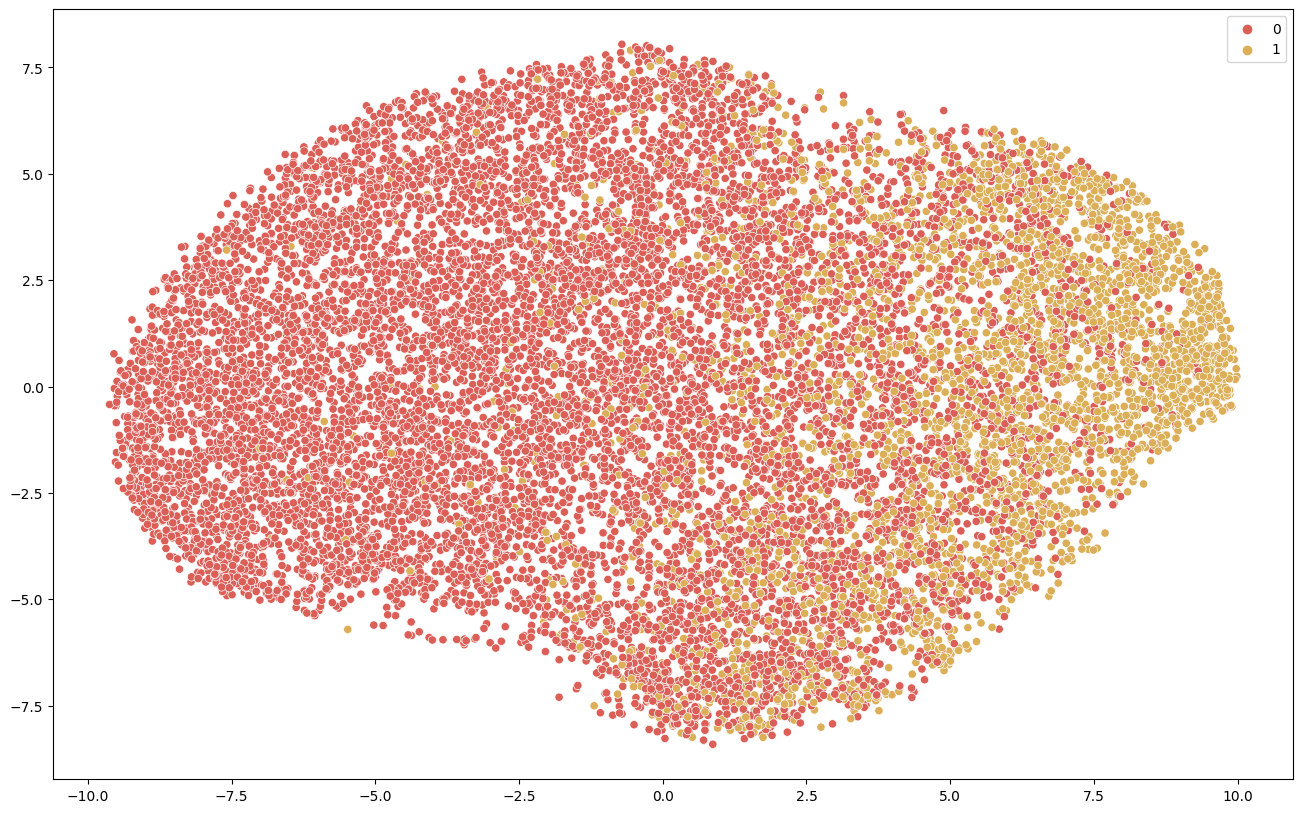

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=test.to_numpy()[:,-1],
    palette=sns.color_palette("hls", 10),
    legend="full",
    # alpha=0.3
) 


In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=40)
clf.fit(representation_tr, train.to_numpy()[:,-1])

In [15]:
te = clf.predict(representation_te)
gt = test.to_numpy()[:,-1]
acc = np.count_nonzero(gt == te) / te.shape[0]
print(acc)

In [29]:
y_p = xy_clf(torch.Tensor(test_loader.dataset.X))
y_p = y_p.detach().numpy().reshape(1,-1)
y_pred = np.ones_like(y_p)
y_pred[y_p<0] = 0.0
acc = np.count_nonzero(gt == y_pred) / gt.shape[0]
print(acc)